In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'dark')

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

# I. Loading and Screening Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Check for **missing** and **duplicated** data.

In [7]:
train_missing_values = pd.DataFrame({'Missing': train.isnull().sum(),
                                     'Percentage': round(train.isnull().sum()/len(train)*100, 2)})

train_missing_values

,Missing,Percentage
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,177,19.87
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00


In [8]:
test_missing_values = pd.DataFrame({'Missing': test.isnull().sum(),
                                    'Percentage': round(test.isnull().sum()/len(test)*100, 2)})

test_missing_values

,Missing,Percentage
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,86,20.57
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,1,0.24
Cabin,327,78.23


In [9]:
train.duplicated().sum()

0

In [10]:
test.duplicated().sum()

0

# II. Exploratory Data Analysis

### Survived

In [11]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

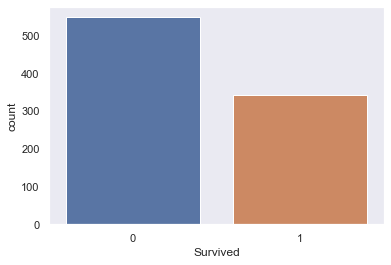

In [12]:
sns.countplot(x = train['Survived'])
plt.show()

In [13]:
# Survivors percentage
round(len(train[train['Survived'] == 1]) / len(train), 3) * 100

38.4

Of all the passengers, there were 342 survivors or 38.4%.

### Pclass

In [14]:
train['Pclass'].value_counts(sort = False)

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [15]:
train.groupby(['Pclass', 'Survived']).Survived.agg(len)

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

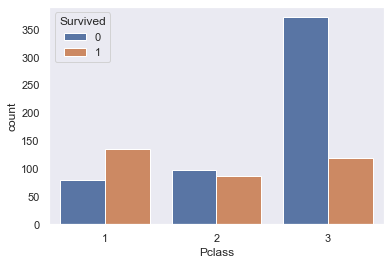

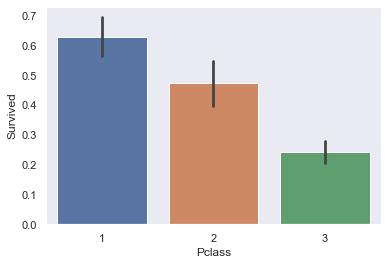

In [16]:
Pclass_survived = sns.countplot(x = train['Pclass'], hue = train['Survived'])
plt.show('Pclass_survived')

Pclass_count = sns.barplot(x = train['Pclass'], y = train['Survived'])
plt.show('Pclass_count')

### Sex

In [17]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
train.groupby(['Sex', 'Survived']).Survived.agg(len)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

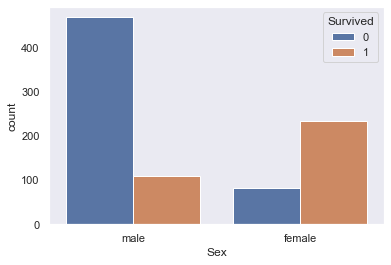

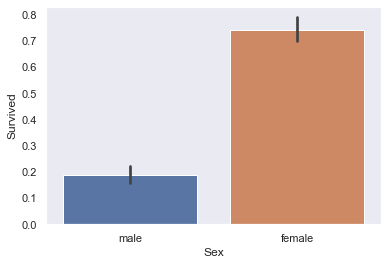

In [19]:
Sex_survived = sns.countplot(x = train['Sex'], hue = train['Survived'])
plt.show('Sex_survived')

Sex_count = sns.barplot(x = train['Sex'], y = train['Survived'])
plt.show('Sex_count')

In [20]:
# Sex-Survivors percentage
round(len(train[(train['Sex'] == 'female') & (train['Survived'] == 1)])/len(train), 2)*100

26.0

In [21]:
# Sex-Survivors percentage
round(len(train[(train['Sex'] == 'female') & (train['Survived'] == 1)])/len(train[(train['Survived'] == 1)]), 2)*100

68.0

### Age

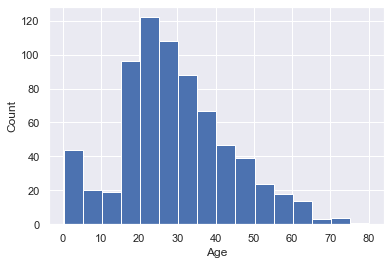

In [22]:
train['Age'].hist(bins = 16)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Siblings/Spouses

In [23]:
train['SibSp'].value_counts(sort = False)

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

In [24]:
train.groupby(['SibSp', 'Survived']).Survived.agg(len)

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

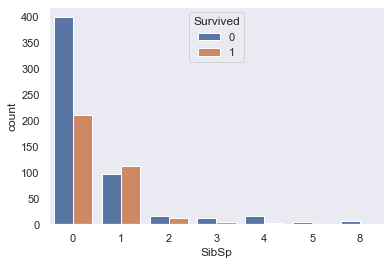

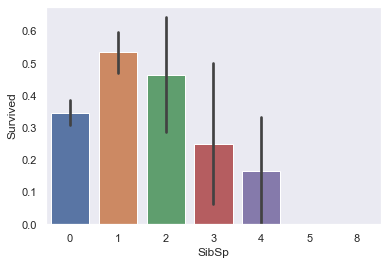

In [25]:
SibSp_survived = sns.countplot(x = train['SibSp'], hue = train['Survived'])
plt.show('SibSp_survived')

SibSp_count = sns.barplot(x = train['SibSp'], y = train['Survived'])
plt.show('SibSp_count')

### Parents/Childrens

In [26]:
train['Parch'].value_counts(sort = False)

0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

In [27]:
train.groupby(['Parch', 'Survived']).Survived.agg(len)

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

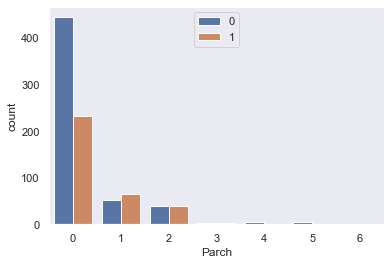

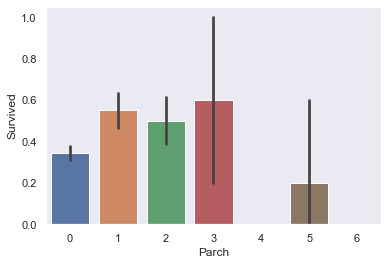

In [28]:
Parch_survived = sns.countplot(x = train['Parch'], hue = train['Survived'])
plt.legend(loc = 'upper center')
plt.show('Parch_survived')

Parch_count = sns.barplot(x = train['Parch'], y = train['Survived'])
plt.show('Parch_count')

### Ticket

In [29]:
train['Ticket'].value_counts().head(10)

CA. 2343        7
1601            7
347082          7
347088          6
CA 2144         6
3101295         6
382652          5
S.O.C. 14879    5
PC 17757        4
2666            4
Name: Ticket, dtype: int64

In [30]:
train[(train.Ticket == 'CA. 2343')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [31]:
train[(train.Ticket == '2666')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.00,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.00,0,3,2666,19.2583,NaN,C


It seems that the passengers with the **same ticket are family or group**.

### Fare

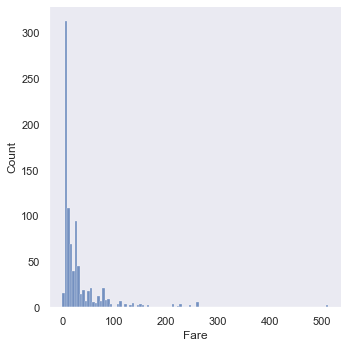

In [32]:
sns.displot(train['Fare'])
plt.show()

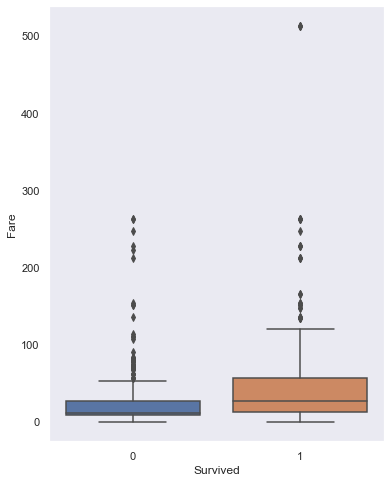

In [33]:
plt.figure(figsize = (6, 8))
sns.boxplot(x = train['Survived'], y = train['Fare'])
plt.show()

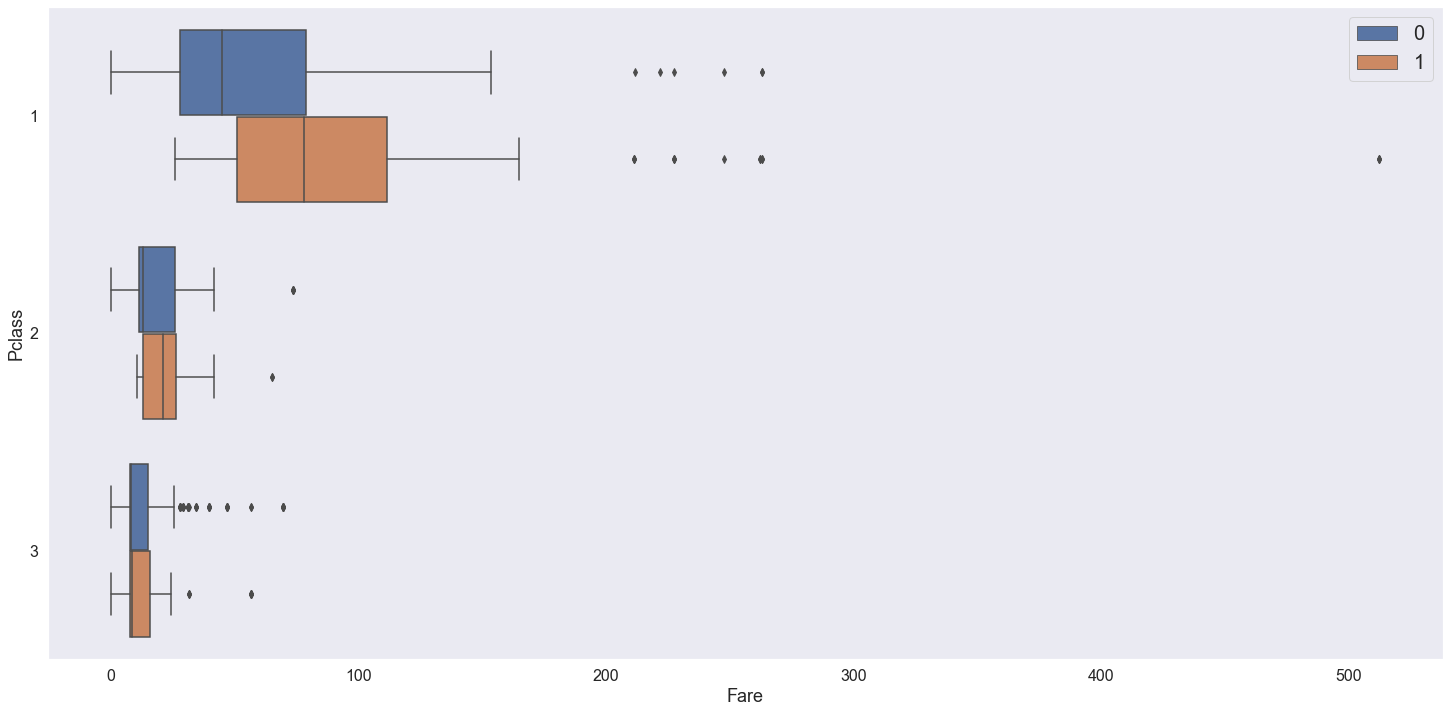

In [34]:
plt.figure(figsize = (25, 12))
sns.boxplot(x = train['Fare'], y = train['Pclass'], hue = train['Survived'], orient = 'h')
plt.xlabel('Fare', fontsize = 18)
plt.ylabel('Pclass', fontsize = 18)
plt.tick_params(labelsize = 16)
plt.legend(fontsize = 20)
plt.show()

### Embarked

In [35]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
train.groupby(['Embarked', 'Survived']).Survived.agg(len)

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

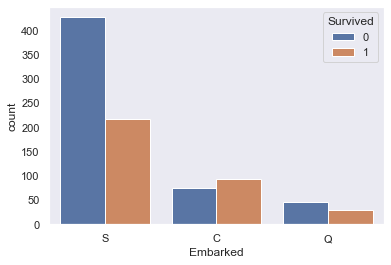

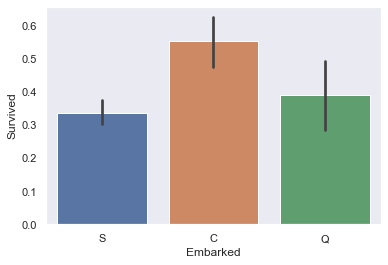

In [37]:
Embarked_survived = sns.countplot(x = train['Embarked'], hue = train['Survived'])
plt.show('Embarked_survived')

Parch_count = sns.barplot(x = train['Embarked'], y = train['Survived'])
plt.show('Embarked_count')

### Data Transformation and Correlation Matrix

In [38]:
sex_dict = {'male': 0, 'female': 1}
embarked_dict = {'S': 1, 'C': 2, 'Q': 3}
train_corr = train[train['Embarked'].notnull()].copy()
train_corr.loc[:, 'Sex'] = train_corr.loc[:,'Sex'].map(lambda x: sex_dict[x])
train_corr.loc[:, 'Embarked'] = train_corr.loc[:, 'Embarked'].map(lambda x: embarked_dict[x])

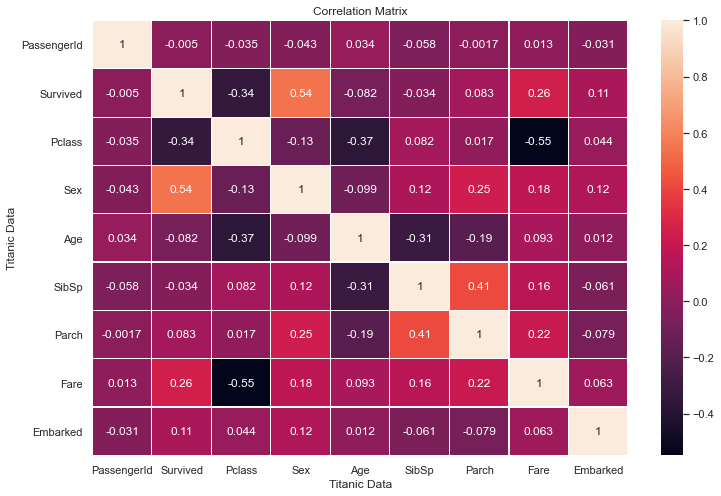

In [39]:
# Visualisation of the corralation table
correlation = train_corr.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Titanic Data')
plt.ylabel('Titanic Data')
plt.show()

## Summary and Takeaways

1. There are some missing values in **Age**, **Embarked** and **Cabin** columns in train dataset. The latter has 70% missing values and I will just remove it, while the others can be filled in using statistical method and feature engineering.
2. For test dataset, **Age**, **Fare** and **Cabin** columns has missing values. I will do the same approaches.
3. Out of 891 passengers, only 342 survived (38%) and mostly are women (68%).
4. Most passengers departed alone, but the **Survived** percentage is lower than those departing in groups or families.
5. From **Ticket** EDA we can see that groups or families use the same ticket, meaning that distribution and correlation can be incorrect.
6. **Sex**, **Fare**, **Embarked** and **Parch** have a positive correlation with **Survived**.

# Feature Engineering and Dealing with Missing Values

### Embarked

In [40]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


They have the same ticket, so it can be assumed that they embarked from the same port. To fill in the missing data, I use the **mode** value.

In [41]:
train['Embarked'] = train['Embarked'].fillna('S')

In [42]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Cabin

**Cabin** containing the most missing values (687 rows or equal to 77.10%). I chose to delete it.

In [43]:
train.drop('Cabin', axis = 1, inplace = True)

In [44]:
test.drop('Cabin', axis = 1, inplace = True)

### Age

In [45]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Title or Salutation from **Name** column can be use to estimate the passenger's age with the missing **Age** value.

For the first step, I created new feature called **Title**.


In [46]:
train['Title'] = train.Name.str.extract(r'([A-Za-z]+)\.', expand = False)
train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Jonkheer      1
Sir           1
Capt          1
Mme           1
Countess      1
Don           1
Lady          1
Name: Title, dtype: int64

In [47]:
train.groupby('Title').Age.agg([len, min, max, 'mean', 'median'])

,len,min,max,mean,median
Title,,,,,
Capt,1.0,70.00,70.0,70.000000,70.0
Col,2.0,56.00,60.0,58.000000,58.0
Countess,1.0,33.00,33.0,33.000000,33.0
Don,1.0,40.00,40.0,40.000000,40.0
Dr,7.0,23.00,54.0,42.000000,46.5
Jonkheer,1.0,38.00,38.0,38.000000,38.0
Lady,1.0,48.00,48.0,48.000000,48.0
Major,2.0,45.00,52.0,48.500000,48.5
Master,40.0,0.42,12.0,4.574167,3.5


After seen **Title** and **Age** table above, I chose to group them in 5 categories: Mr, Mrs, Master, Miss and the rest as Others.

In [48]:
train['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Mlle', 'Capt', 'Ms', 'Countess',
                        'Jonkheer', 'Lady', 'Don', 'Sir', 'Mme'], 'Others', inplace = True)

In [49]:
train.groupby('Title').Age.agg([len, min, max, 'mean', 'median'])

,len,min,max,mean,median
Title,,,,,
Master,40.0,0.42,12.0,4.574167,3.5
Miss,182.0,0.75,63.0,21.773973,21.0
Mr,517.0,11.00,80.0,32.368090,30.0
Mrs,125.0,14.00,63.0,35.898148,35.0
Others,27.0,23.00,70.0,42.384615,44.5


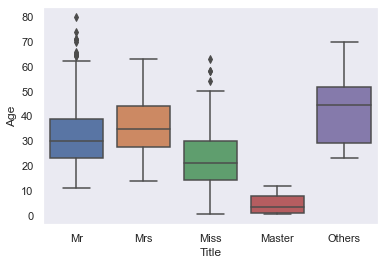

In [50]:
sns.boxplot(x = train['Title'], y = train['Age'])
plt.show()

In [51]:
train.groupby(['Title', 'Survived']).Survived.agg(len)

Title   Survived
Master  0            17
        1            23
Miss    0            55
        1           127
Mr      0           436
        1            81
Mrs     0            26
        1            99
Others  0            15
        1            12
Name: Survived, dtype: int64

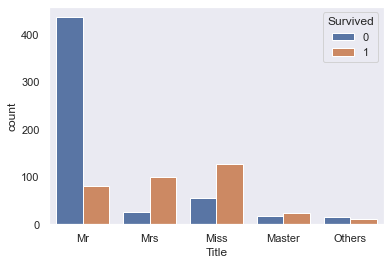

In [52]:
sns.countplot(x = train['Title'], hue = train['Survived'])
plt.show()

This data is in correspond with **Sex-Survivor** data.

Use median value to fill **Age** missing values.

In [53]:
Title_AgeMedian = train.groupby('Title').Age.median()

Title_AgeMedian

Title
Master     3.5
Miss      21.0
Mr        30.0
Mrs       35.0
Others    44.5
Name: Age, dtype: float64

In [54]:
Age_master = train.loc[(train.Title == 'Master')].Age.median()
Age_miss = train.loc[(train.Title == 'Miss')].Age.median()
Age_mr = train.loc[(train.Title == 'Mr')].Age.median()
Age_mrs = train.loc[(train.Title == 'Mrs')].Age.median()
Age_others = train.loc[(train.Title == 'Others')].Age.median()

In [55]:
def myfunc(age, title):
    if pd.isnull(age) and title == 'Master':
        age = Age_master
    elif pd.isnull(age) and title == 'Miss':
        age = Age_miss
    elif pd.isnull(age) and title == 'Mr':
        age = Age_mr
    elif pd.isnull(age) and title == 'Mrs':
        age = Age_mrs
    elif pd.isnull(age) and title == 'Others':
        age = Age_others
    else:
        age = age
    return age

In [56]:
train['Age_Filled'] = train.apply(lambda x: myfunc(x['Age'], x['Title']), axis=1)

Drop **Age** column, since it has been replaced with a new **Age_Filled** column.

In [57]:
train.drop('Age', axis = 1, inplace = True)

In [58]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Age_Filled     0
dtype: int64

### Passenger Group Size

In [59]:
Alone = train.loc[(train['Parch'] == 0) & (train['SibSp'] == 0)]
Alone

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_Filled
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,Miss,26.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,Mr,35.0
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,Q,Mr,30.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,S,Mr,54.0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,0,0,113783,26.5500,S,Miss,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,0,0,SOTON/OQ 392076,7.0500,S,Mr,25.0
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S,Others,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S,Miss,19.0
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C,Mr,26.0


In [60]:
Alone.Survived.value_counts()

0    374
1    163
Name: Survived, dtype: int64

In [61]:
Group = train.loc[(train['Parch'] != 0) & (train['SibSp'] != 0)]
Group

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_Filled
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750,S,Master,2.0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,1,1,PP 9549,16.7000,S,Miss,4.0
13,14,0,3,"Andersson, Mr. Anders Johan",male,1,5,347082,31.2750,S,Mr,39.0
16,17,0,3,"Rice, Master. Eugene",male,4,1,382652,29.1250,Q,Master,2.0
24,25,0,3,"Palsson, Miss. Torborg Danira",female,3,1,349909,21.0750,S,Miss,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,1,1,36928,164.8667,S,Mrs,45.0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,8,2,CA. 2343,69.5500,S,Miss,21.0
869,870,1,3,"Johnson, Master. Harold Theodor",male,1,1,347742,11.1333,S,Master,4.0
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,1,1,11751,52.5542,S,Mrs,47.0


In [62]:
Group.Survived.value_counts()

0    80
1    62
Name: Survived, dtype: int64

In [63]:
train['GroupSize'] = train.SibSp + train.Parch + 1
train.GroupSize.head()

0    2
1    2
2    1
3    2
4    1
Name: GroupSize, dtype: int64

### Fare per Person

From the **Fare** EDA we can see that families or groups have the same ticket, so it can affect the distribution. To deal with it, I want to create a new feature called **Fare per person**.

In [64]:
train['Fare_per_person'] = 0.
train['Group_size'] = 0.
for index, row in train.iterrows():
    group_size = train['Ticket'].value_counts()[row['Ticket']]
    train.at[index, 'Fare_per_person'] = row['Fare'] / group_size
    train.at[index, 'Group_size'] = group_size

In [65]:
train

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_Filled,GroupSize,Fare_per_person,Group_size
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,Mr,22.0,2,7.2500,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,Mrs,38.0,2,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,Miss,26.0,1,7.9250,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,Mrs,35.0,2,26.5500,2.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,Mr,35.0,1,8.0500,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S,Others,27.0,1,13.0000,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S,Miss,19.0,1,30.0000,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S,Miss,21.0,4,11.7250,2.0
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C,Mr,26.0,1,30.0000,1.0


# Another Transformation

In [66]:
GroupSize = train.Parch + train.SibSp
GroupSize.value_counts(sort = False)

0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
dtype: int64

In [67]:
train['Alone'] = train.GroupSize.map(lambda x: 1 if x == 1 else 0)

train['Alone'].value_counts(sort = False)

0    354
1    537
Name: Alone, dtype: int64

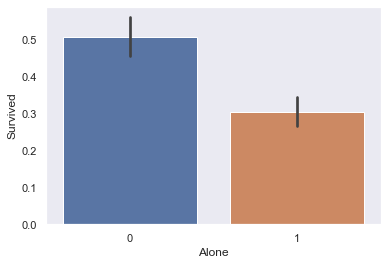

In [68]:
sns.barplot(x = train['Alone'], y = train['Survived'])
plt.show()

In [69]:
sex_dict = {'male': 0, 'female': 1}
embarked_dict = {'S': 1, 'C': 2, 'Q': 3}
title_dict = {'Master': 1, 'Miss': 2, 'Mr': 3, 'Mrs': 4, 'Others': 5}
train = train[train['Embarked'].notnull()].copy()
train.loc[:, 'Sex'] = train.loc[:,'Sex'].map(lambda x: sex_dict[x])
train.loc[:, 'Embarked'] = train.loc[:, 'Embarked'].map(lambda x: embarked_dict[x])
train.loc[:, 'Title'] = train.loc[:, 'Title'].map(lambda x: title_dict[x])
train['Alone'] = train.GroupSize.map(lambda x: 1 if x == 1 else 0)

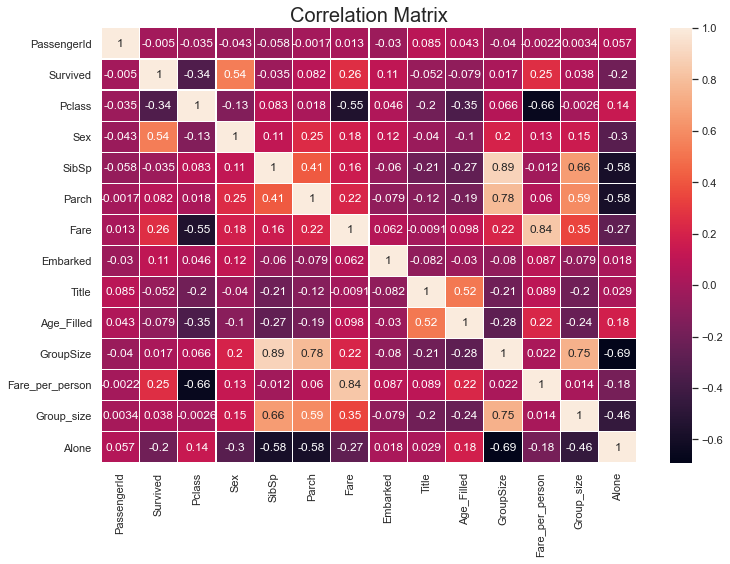

In [70]:
correlation = train.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix', fontsize = 20)
plt.show()

There are positive correlations between **Survived** and **Sex**, **Parch**, **Fare**, **Embarked** and **Group Size**. In addition, the use of titles to fill in the missing age values ​​shows a fairly good correlation.

# Feature Selection

In [71]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Title', 'Age_Filled', 'GroupSize',
       'Fare_per_person', 'Group_size', 'Alone'],
      dtype='object')

In [72]:
X_train = train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Fare'], axis = 1)
y_train = train['Survived']

In [73]:
model = RandomForestClassifier(n_estimators = 200, random_state = 2)

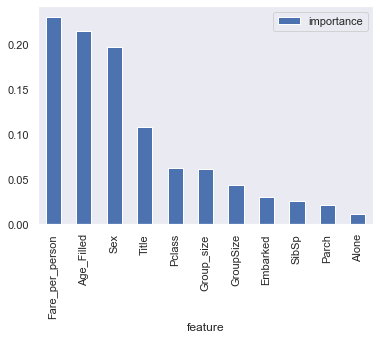

In [74]:
model.fit(X_train,y_train)
importance = pd.DataFrame({'feature' : X_train.columns, 'importance': np.round(model.feature_importances_,3)})
importance = importance.sort_values('importance', ascending = False).set_index('feature')

importance.plot(kind = 'bar')
plt.show()

In [75]:
final = ['Fare_per_person', 'Age_Filled', 'Sex', 'Title', 'Pclass']

# ML Model

In [76]:
grid_param = {
 'n_estimators': [100, 200, 300],
 'criterion':['gini', 'entropy'],
 'min_samples_split': [2, 10, 20],
 'min_samples_leaf': [1, 5],
 'bootstrap': [True, False],
}

gd_sr = GridSearchCV(estimator = model,
 param_grid = grid_param,
 scoring = 'accuracy',
 cv = 5,
 n_jobs = -1)

gd_sr.fit(X_train[final], y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)

# Output: {'bootstrap': True, 'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 300}

{'bootstrap': True, 'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [79]:
model = RandomForestClassifier(n_estimators = 200, bootstrap = True, criterion = 'gini', 
                               min_samples_leaf = 1, min_samples_split = 10, random_state = 2)

In [81]:
all_accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv=5)
all_accuracies
all_accuracies.mean()

0.8316678174628084